In [1]:
from sklearn.datasets import fetch_20newsgroups 
# Download the dataset 
newsgroups_train = fetch_20newsgroups(subset='train') 
newsgroups_test = fetch_20newsgroups(subset='test') 

In [2]:
import nltk
nltk.download('reuters')
from nltk.corpus import reuters

# Get the list of fileids for training and testing sets
train_docs = [d for d in reuters.fileids() if d.startswith("train")]
test_docs = [d for d in reuters.fileids() if d.startswith("test")]

# Load the dataset
train_data = [reuters.raw(doc_id) for doc_id in train_docs]
train_labels = [reuters.categories(doc_id)[0] for doc_id in train_docs]
test_data = [reuters.raw(doc_id) for doc_id in test_docs]
test_labels = [reuters.categories(doc_id)[0] for doc_id in test_docs]

[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\Owaise\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!


In [3]:
print("Training data sample:")
print(train_data[:5])
print("Training labels sample:")
print(train_labels[:5])

Training data sample:
['BAHIA COCOA REVIEW\n  Showers continued throughout the week in\n  the Bahia cocoa zone, alleviating the drought since early\n  January and improving prospects for the coming temporao,\n  although normal humidity levels have not been restored,\n  Comissaria Smith said in its weekly review.\n      The dry period means the temporao will be late this year.\n      Arrivals for the week ended February 22 were 155,221 bags\n  of 60 kilos making a cumulative total for the season of 5.93\n  mln against 5.81 at the same stage last year. Again it seems\n  that cocoa delivered earlier on consignment was included in the\n  arrivals figures.\n      Comissaria Smith said there is still some doubt as to how\n  much old crop cocoa is still available as harvesting has\n  practically come to an end. With total Bahia crop estimates\n  around 6.4 mln bags and sales standing at almost 6.2 mln there\n  are a few hundred thousand bags still in the hands of farmers,\n  middlemen, export

In [4]:
print("Testing data sample:")
print(test_data[:5])
print("Testing labels sample:")
print(test_labels[:5])

Testing data sample:
['ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RIFT\n  Mounting trade friction between the\n  U.S. And Japan has raised fears among many of Asia\'s exporting\n  nations that the row could inflict far-reaching economic\n  damage, businessmen and officials said.\n      They told Reuter correspondents in Asian capitals a U.S.\n  Move against Japan might boost protectionist sentiment in the\n  U.S. And lead to curbs on American imports of their products.\n      But some exporters said that while the conflict would hurt\n  them in the long-run, in the short-term Tokyo\'s loss might be\n  their gain.\n      The U.S. Has said it will impose 300 mln dlrs of tariffs on\n  imports of Japanese electronics goods on April 17, in\n  retaliation for Japan\'s alleged failure to stick to a pact not\n  to sell semiconductors on world markets at below cost.\n      Unofficial Japanese estimates put the impact of the tariffs\n  at 10 billion dlrs and spokesmen for major electronics firm

In [5]:
import nltk
from nltk.corpus import reuters
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split

In [6]:
# Download the required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owaise\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owaise\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
# Define a function to preprocess the text data
def preprocess_text(text):
    # Tokenize the text into words
    words = word_tokenize(text.lower())

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Stem the words
    porter = PorterStemmer()
    words = [porter.stem(word) for word in words]

    # Lemmatize the words
    lemmatizer = nltk.WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Return the preprocessed text as a string
    return ' '.join(words)

In [8]:
# Get the list of fileids for training and testing sets
train_docs = [d for d in reuters.fileids() if d.startswith("train")]
test_docs = [d for d in reuters.fileids() if d.startswith("test")]

Load the dataset

In [10]:
train_data = []
train_labels = []
for doc_id in train_docs:
    train_data.append(preprocess_text(reuters.raw(doc_id)))
    train_labels.append(reuters.categories(doc_id)[0])

In [11]:
test_data = []
test_labels = []
for doc_id in test_docs:
    test_data.append(preprocess_text(reuters.raw(doc_id)))
    test_labels.append(reuters.categories(doc_id)[0])

In [12]:
# Split the dataset into training and testing sets in a ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

Using Bag of Words

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit the vectorizer on the training data
vectorizer.fit(X_train)

# Transform the training and testing data into numerical vectors
X_train_bow = vectorizer.transform(X_train)
X_test_bow = vectorizer.transform(X_test)

In [14]:
# y_train and y_test variables do not need to be transformed into numerical vectors, 
# as they are already categorical labels.

## Implementing Naive  Bayes,  Logistic  Regression,  SVM,  and  Random  Forest  models  for  text  classification  using the scikit-learn library. 

In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [16]:
# initialize the imported models
nb = MultinomialNB()
lr = LogisticRegression()
svm = LinearSVC()
rf = RandomForestClassifier()

In [18]:
lr = LogisticRegression(max_iter=1000)

In [26]:
svm = LinearSVC(max_iter=50000)

Train models on the training set

In [21]:
nb.fit(X_train_bow, y_train)
lr.fit(X_train_bow, y_train)

LogisticRegression(max_iter=1000)

In [22]:
rf.fit(X_train_bow, y_train)

RandomForestClassifier()

In [27]:
svm.fit(X_train_bow, y_train)

LinearSVC(max_iter=50000)

Evaluate models on the testing set

In [28]:
nb_pred = nb.predict(X_test_bow)

In [29]:
lr_pred = lr.predict(X_test_bow)

In [30]:
svm_pred = svm.predict(X_test_bow)

In [31]:
rf_pred = rf.predict(X_test_bow)

Calculate evaluation metrics

In [32]:
nb_accuracy = accuracy_score(y_test, nb_pred)
lr_accuracy = accuracy_score(y_test, lr_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

In [41]:
# !! UndefinedMetricWarning

# some classes in test data that have no predicted samples by the Naive Bayes model. 
# This can happen if the model is unable to learn patterns or features that distinguish between those classes. 
# As a result, the precision score for those classes is undefined and is being set to 0.0.

# To handle this warning, you can use the zero_division parameter in the precision_score function. 
# This parameter controls the value to be returned when there are no predicted samples for a class

In [42]:
nb_precision = precision_score(y_test, nb_pred, average='weighted', zero_division=1)
lr_precision = precision_score(y_test, lr_pred, average='weighted', zero_division=1)
svm_precision = precision_score(y_test, svm_pred, average='weighted', zero_division=1)
rf_precision = precision_score(y_test, rf_pred, average='weighted', zero_division=1)

In [46]:
nb_recall = recall_score(y_test, nb_pred, average='weighted', zero_division=1)
lr_recall = recall_score(y_test, lr_pred, average='weighted', zero_division=1)
svm_recall = recall_score(y_test, svm_pred, average='weighted', zero_division=1)
rf_recall = recall_score(y_test, rf_pred, average='weighted', zero_division=1)

In [47]:
nb_f1 = f1_score(y_test, nb_pred, average='weighted')
lr_f1 = f1_score(y_test, lr_pred, average='weighted')
svm_f1 = f1_score(y_test, svm_pred, average='weighted')
rf_f1 = f1_score(y_test, rf_pred, average='weighted')

## Compare  the  performance

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
# Create a DataFrame to store the evaluation metrics
data = {
    'Model': ['Naive Bayes', 'Logistic Regression', 'SVM', 'Random Forest'],
    'Accuracy': [nb_accuracy, lr_accuracy, svm_accuracy, rf_accuracy],
    'Precision': [nb_precision, lr_precision, svm_precision, rf_precision],
    'Recall': [nb_recall, lr_recall, svm_recall, rf_recall],
    'F1-score': [nb_f1, lr_f1, svm_f1, rf_f1]
}

In [50]:

df = pd.DataFrame(data)

In [56]:
print(df)

                 Model  Accuracy  Precision    Recall  F1-score
0          Naive Bayes  0.825611   0.855953  0.825611  0.805528
1  Logistic Regression  0.913771   0.920675  0.913771  0.910011
2                  SVM  0.907336   0.912848  0.907336  0.905863
3        Random Forest  0.839768   0.853440  0.839768  0.822873


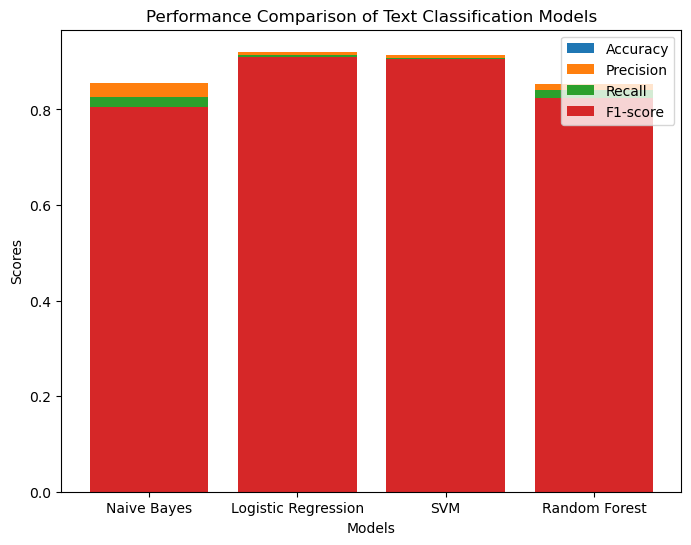

In [59]:
plt.figure(figsize=(8,6))

plt.bar(df['Model'], df['Accuracy'], label='Accuracy')
plt.bar(df['Model'], df['Precision'], label='Precision')
plt.bar(df['Model'], df['Recall'], label='Recall')
plt.bar(df['Model'], df['F1-score'], label='F1-score')


plt.xlabel('Models')
plt.ylabel('Scores')


plt.title('Performance Comparison of Text Classification Models')
plt.legend()


plt.show()